read the data from nist... file   
    problem may come up: can't read the data    
                         can't related the data with colunm      
                         type error     
  
    
mapping wafer    
    pro: how to mapping?    
         how to do sth like circle backgrond     
         
goal 1:
    for each pixel which pad them go

goal 2:
    for neibor pad which pixel they go

    

paper(more like backgroud introduction) or pdf 
    Fig 17
        circle
        cross (focus point)
        dark point

Airy disk

crosstalk

​
Yifu Chen
​
https://arxiv.org/pdf/1403.4302

We talked about Figure 17, and crosstalk.

https://en.wikipedia.org/wiki/Airy_disk

https://webbtelescope.org/contents/media/images/01G529MX46J7AFK61GAMSHKSSN

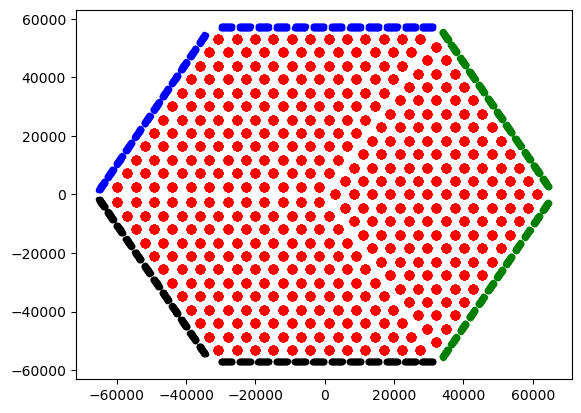

In [86]:
#This will be the program first use histogram  and then mapping the wafer

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd


#Read the data
data = pd.read_csv('nist_so_mf_detector_array_padinfo.csv')

#get columns vaule about pixel positon
pixel_x_center = data['Pixel X center']
pixel_y_center = data['Pixel Y center']

# try use same method above by Pad X center,Pad Y center
pad_x_center = data['Pad X center']
pad_y_center = data['Pad Y center']

pad_x_center_A = []
pad_y_center_A = []
PXCB = []
PYCB = []
PXCC = []
PYCC = []


for i in range(len(data)):
    
    if data['Group Section'][i] == 'A':
        
        pad_x_center_A.append(int(data['Pad X center'][i]))
        pad_y_center_A.append(int(data['Pad Y center'][i]))
    
    if data['Group Section'][i] == 'B':
        
        PXCB.append(int(data['Pad X center'][i]))
        PYCB.append(int(data['Pad Y center'][i]))

    if data['Group Section'][i] == 'C':
        
        PXCC.append(int(data['Pad X center'][i]))
        PYCC.append(int(data['Pad Y center'][i]))


#pad_x_center = pad_x_center[100:150] #The code see how pad positon data goes
#pad_y_center = pad_y_center[100:150]


#histogram
#plt.hist2d(pixel_x_center, pixel_y_center, bins = (100,100), norm=colors.LogNorm())
plt.scatter(pixel_x_center, pixel_y_center, c='r', marker='o')
plt.scatter(pad_x_center_A, pad_y_center_A, c='b', marker='.')
plt.scatter(PXCB, PYCB, c='g', marker='.')
plt.scatter(PXCC, PYCC, c='k', marker='.')
#colors.LogNorm() normalize a given value to the 0-1 range on a log scale to show the log scale
# use norm to emphasize the exist value 

plt.show()

#this plot show the wafer location in the plot

In [87]:
""" You can ignore the code below it is same function as the cell below

    this part of code will help me understand to achieve goal 1 of the project
    try to re-group the data by pixel x and pixel y
    to show what is right number of distance I should look for
"""

# data_goal1 = data[['Pixel X center', 'Pixel Y center', 'Pad X center', 'Pad Y center']]
# data_goal1 = np.array(data_goal1).tolist()

# #get unique pixel x 
# unique_pixel_x = np.unique(pixel_x_center)

# distance_goal1 = []
# #first group the data by pixel x save to group_data
# #and then group the data by pixel y
# #and then calculate the distance to the pad

# #group_data = []
# group_data_y = []
# number_of_distance = []

# for j in range(len(unique_pixel_x)):    
    
#     group_same_x = []    

#     #first group the data by pixel x
#     for i in range(len(data)):
#         if pixel_x_center[i] == unique_pixel_x[j]:
#             group_same_x.append(data_goal1[i])

#     # get pixel y position from group_data
#     group_same_x = np.array(group_same_x)
#     y_pixel_in_group = group_same_x[:,1]
#     unique_pixel_y = np.unique(y_pixel_in_group)   
#     for k in range(len(unique_pixel_y)):

#         group_same_y = []
#         for i in range(len(group_same_x)):
#             if y_pixel_in_group[i] == unique_pixel_y[k]:
#                 #group the data by same pixel y   
#                 group_same_y.append(group_same_x[i])
#                 group_data_y.append(group_same_x[i])
        
#         length_group_y = len(group_same_y)
#         number = 0
#         #calculate the distance between pad for one group
#         for i in range(length_group_y ):
#             number += 1
#         number_of_distance.append(number)
        
    
# path_filename = '.\data\same pixel x and y data'    
# # Save data to CSV
# regroup_data = np.array(group_data_y)
# data_RG = np.column_stack((regroup_data[:,0],regroup_data[:,1],regroup_data[:,2],regroup_data[:,3])) 
# # the data for number_per_bin
# df = pd.DataFrame(data_RG,columns=['Pixel X center', 'Pixel Y center', 'Pad X center', 'Pad Y center'])
# df.to_csv(f'{path_filename}.csv', index=False)

# reshape_number_of_distance = np.reshape(number_of_distance,(1,len(number_of_distance)))
# reshape_number_of_distance = np.array(reshape_number_of_distance)   
# data_ND = np.column_stack((reshape_number_of_distance))
# df2 = pd.DataFrame(data_ND,columns=[f'Sum of ND is {np.sum(number_of_distance)}']) 
# df2.to_csv('.\data\distance num for goal1.csv', index=False)  




' You can ignore the code below it is same function as the cell below\n\n    this part of code will help me understand to achieve goal 1 of the project\n    try to re-group the data by pixel x and pixel y\n    to show what is right number of distance I should look for\n'

We have  3528  data 
 max is:  108570.14502960573 
 min is:  425.7923655269043


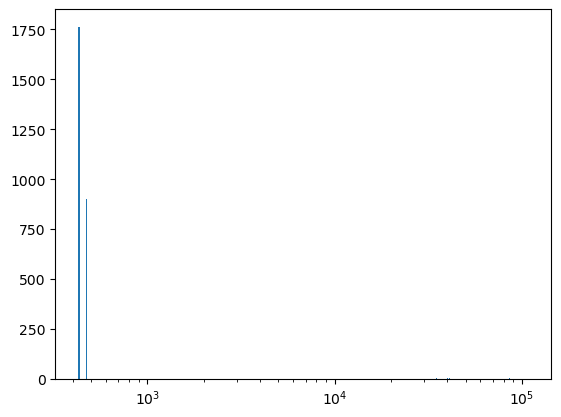

In [88]:
""" 
this part of code is the goal 1 of the project
    calculate the data for each pixel the distance to the related pad
    histogram of the data
"""

data_goal1 = data[['Pixel X center', 'Pixel Y center', 'Pad X center', 'Pad Y center']]
data_goal1 = np.array(data_goal1).tolist()

#get unique pixel x 
unique_pixel_x = np.unique(pixel_x_center)

distance_goal1 = []
#first group the data by pixel x save to group_data
#and then group the data by pixel y
#and then calculate the distance to the pad

#number_of_distance = []

for j in range(len(unique_pixel_x)):
    group_data = []
    
    
    #first group the data by pixel x
    for i in range(len(data)):
        if pixel_x_center[i] == unique_pixel_x[j]:
            group_data.append(data_goal1[i])

    # get pixel y position from group_data
    group_data = np.array(group_data)
    y_pixel_in_group = group_data[:,1]
    unique_pixel_y = np.unique(y_pixel_in_group)   
    for k in range(len(unique_pixel_y)):

        group_data_y = []
        for i in range(len(group_data)):
            if y_pixel_in_group[i] == unique_pixel_y[k]:
                #group the data by same pixel y   
                group_data_y.append(group_data[i])
        
        length_group_y = len(group_data_y)

        #number_dis_4_group = 0 # the number of distance for one group
        #calculate the distance between pad for one group
        for i in range(length_group_y):
        
            if i+1 < length_group_y: 
                #number_dis_4_group += 1
                pad_x_distance = group_data_y[i][2] - group_data_y[i+1][2]
                pad_y_distance = group_data_y[i][3] - group_data_y[i+1][3]
            
            elif i+1 == length_group_y:
                #number_dis_4_group += 1
                pad_x_distance = group_data_y[i][2] - group_data_y[0][2]
                pad_y_distance = group_data_y[i][3] - group_data_y[0][3]
                
            distance = np.sqrt((pad_x_distance)**2 + (pad_y_distance)**2)
            distance_goal1.append(distance)
        
        #number_of_distance.append(number_dis_4_group)

#show how many data we calculted the distance
print("We have ",len(distance_goal1),
      " data \n max is: ",np.max(distance_goal1),
      "\n min is: ",np.min(distance_goal1)) 


#save histogram data to a file         
#print(len(distance_goal1)) #num ==len(distance_goal1)
num, bins, patches = plt.hist(distance_goal1, bins=10000)
# bins = 100000 need 6m 51s to run

path_filename = f'.\data\goal1 {len(bins)-1}bins '


#create an array stored the value number per bin
number_per_bin = []
for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
            
# Save data to CSV
number_per_bin = np.array(number_per_bin)
data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# the data for number_per_bin
df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
df.to_csv(f'{path_filename}.csv', index=False)

plt.xscale('log')
plt.savefig(f'{path_filename}.png')  
plt.show()

# print(np.sum(num)) 
# print(number_of_distance,"\n",sum(number_of_distance)) 
# #check the number of distance is correct    

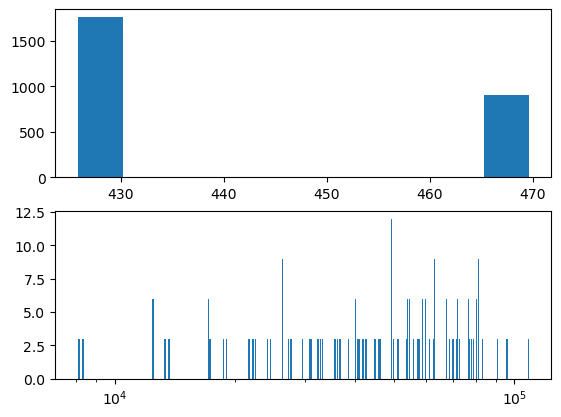

In [89]:
# try to seperate the data to see plot more clearly
# 480 is decide by the histogram data above
dis_g1_less480 = []
dis_g1_other = []
for i in range(len(distance_goal1)):
    if distance_goal1[i] < 480:
        dis_g1_less480.append(distance_goal1[i])
    else:
        dis_g1_other.append(distance_goal1[i])

fig, axs = plt.subplots(2,1)

axs[0].hist(dis_g1_less480, bins=10)
axs[1].hist(dis_g1_other, bins=1000)
plt.xscale('log')
plt.show()


># This part of code is the goal 2 of the project  
>>reorder the data based on their pad postion  
>>let pad is neighbor to the next pad  
>> based on 'Group Section' it have three parts
![alt text](output.png)         
>>blue is part A, green is B and black is C             
>>get the distance between their related pixel position     
>>plot the histogram of the distance     


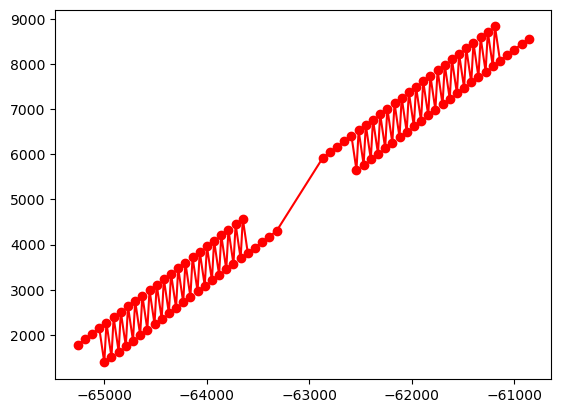

In [90]:
# goal 2

data_goal2 = data[['Group Section','Pad X center', 'Pad Y center','Pixel X center', 'Pixel Y center']]
data_goal2 = np.array(data_goal2).tolist()

# seperate the data by group section
group_A = []
group_B = []
group_C = []
for i in range(len(data_goal2)):
    if data_goal2[i][0] == 'A':
        group_A.append(data_goal2[i])
    elif data_goal2[i][0] == 'B':
        group_B.append(data_goal2[i])
    elif data_goal2[i][0] == 'C':
        group_C.append(data_goal2[i])

#reorder the group A B C use sorted function
# for group A, sort by pad x increasing
group_A = sorted(group_A, key = lambda x: x[1])
# for group B, sort by pad y decreasing
group_B = sorted(group_B, key = lambda x: x[2], reverse=True)
# for group A, sort by pad x decreasing
group_C = sorted(group_C, key = lambda x: x[1], reverse=True)
    
reorder_data = group_A + group_B + group_C

pad_x_re = [row[1] for row in reorder_data][1:100]
pad_y_re = [row[2] for row in reorder_data][1:100]
plt.plot(pad_x_re,pad_y_re, 'ro-')



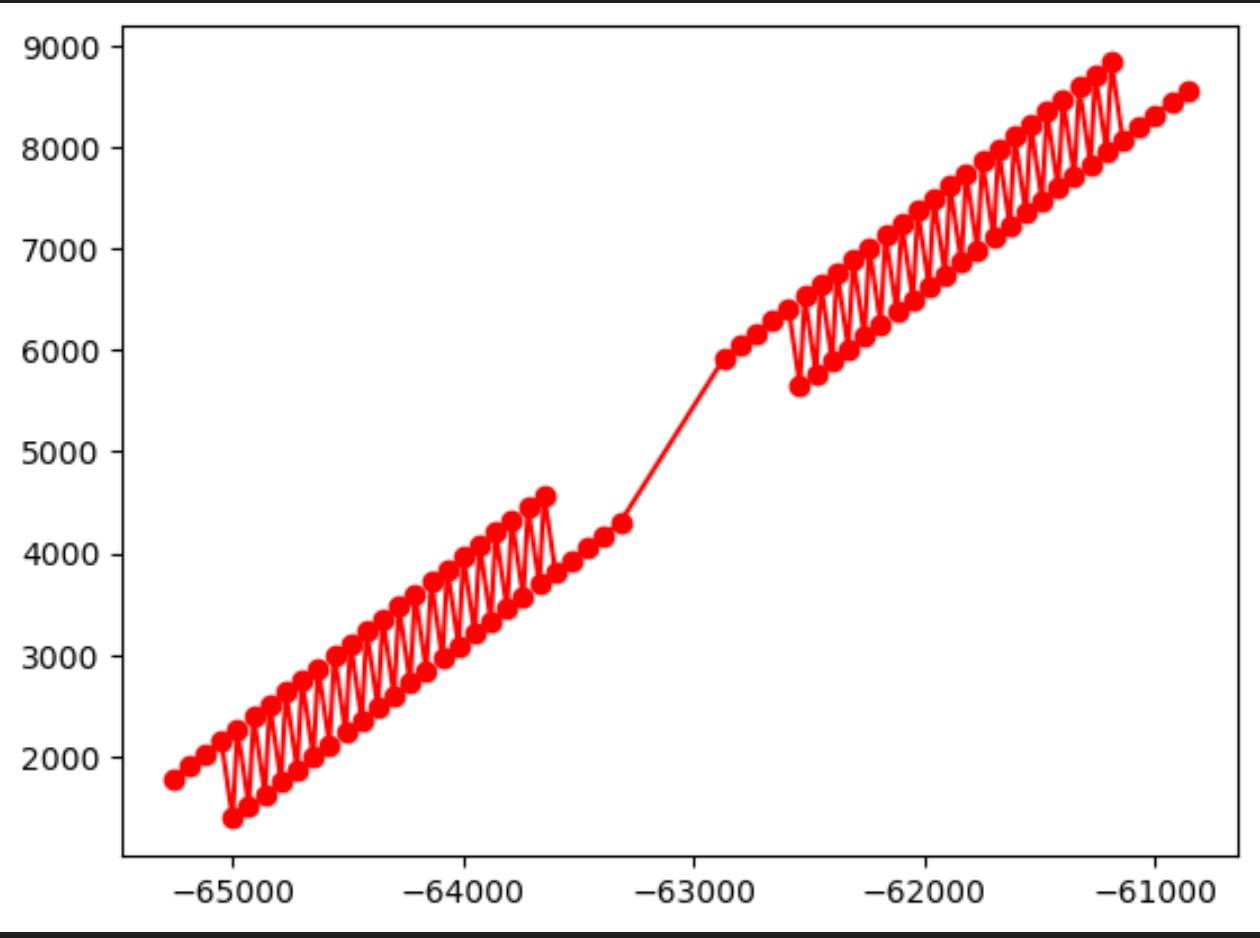
From the result above I think it is reasonable to say that each 50 data is in a close group based on pad position       
for one group it has two parts that is the close position       
Problem: So is it matter that we need treat one group as two?       
or because it is the place wires inport to the plane, as the wires will extend, so it's no need treat one group as two part?        

We have  3528  data 
 max is:  64000.2450081195 
 min is:  3857.941575709121


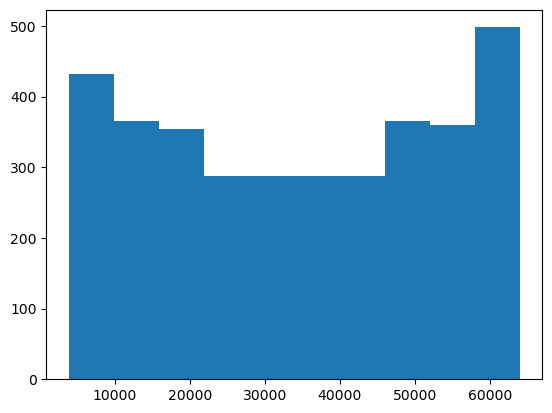

In [91]:
""" 
this part of code is doing sth
    this code calculate the distance between pixel and pad
"""

#use the for loop for all pixel position to calculate the distance to the pad
# this wouldn't grouping the pixel at same positon 

distance = []

#distance = sqrt((x1-x2)^2 + (y1-y2)^2)
for i in range(len(data)):
    x_distance = pixel_x_center[i]-pad_x_center[i]
    y_distance = pixel_y_center[i]-pad_y_center[i]
    distance.append(np.sqrt(x_distance**2 + y_distance**2))


#show how many pixel we calculted the distance
print("We have ",len(distance),
      " data \n max is: ",np.max(distance),
      "\n min is: ",np.min(distance)) 

num, bins, patches = plt.hist(distance, bins=10)
plt.savefig(f'.\data\pixel to pad {len(bins)-1}bins data.png') 
#   bins =60000 need run 1min22sec

#create an array stored the value number per bin
number_per_bin = []
for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
        
    
    
# Save data to CSV
number_per_bin = np.array(number_per_bin)
data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# the data for number_per_bin
df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
df.to_csv(f'.\data\pixel to pad {len(bins)-1}bins data.csv', index=False)


plt.show()

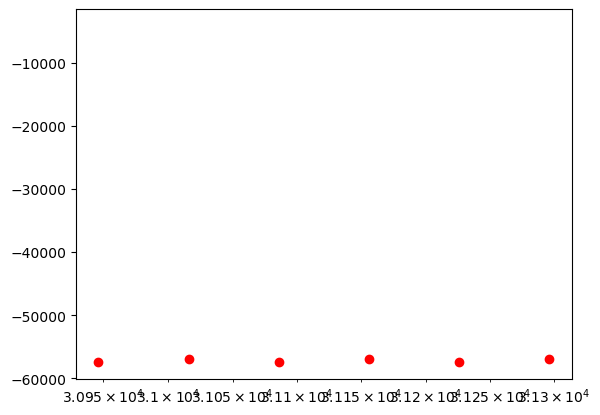

In [92]:
""" 
test the goal1 by using the Pixel X center,Pixel Y center = (-1529.978,2650.000) point
    one point show x,y position of the wafer
    plot four wires(?) show the wafer to pad edge
    
May need use animation to show each wafer to pad edge
problem is the plot about pad position is not clear
"""
#pick out the test point (-1529.978,2650.000)
testPoint = [[],[]]



for i in range(len(data)):
    if (data['Pixel X center'][i] == pixel_x_center[100]) and (data['Pixel Y center'][i] == pixel_y_center[100]):
        testPoint[0].append([data['Pad X center'][i]])
        testPoint[1].append([data['Pad Y center'][i]])
        

#print(testPoint)

plt.plot(testPoint[0],testPoint[1], 'ro')
plt.xscale('log') #???
plt.show()
